In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zomato=pd.read_csv('zomato.csv')

In [3]:
zomato.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


# Data cleaning

In [4]:
zomato.isnull()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
51713,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
51714,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
zomato=zomato.drop(['url','address','phone','reviews_list','menu_item'],axis=1)

In [6]:
zomato.drop(['dish_liked'],axis=1,inplace=True)

In [7]:
zomato.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [8]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [9]:
zomato.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [10]:
zomato['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
zomato['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
# Create a dictionary to map values
mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the "object" column required to change to int
zomato['online_order'] = zomato['online_order'].map(mapping)
zomato['book_table'] = zomato['book_table'].map(mapping)


In [13]:
zomato['online_order'].unique()

array([1, 0], dtype=int64)

In [14]:
zomato['book_table'].unique()

array([1, 0], dtype=int64)

In [15]:
zomato['approx_cost(for two people)'].unique()
#the column consists of nan
#zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].astype(int)

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [16]:
# Remove commas and convert to integers, handling errors and setting NaN for non-convertible values
zomato['approx_cost(for two people)'] = pd.to_numeric(zomato['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')
#The errors='coerce' argument means that if any value cannot be converted to a number, it will be replaced with a NaN value.

In [17]:
zomato['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [18]:
# Replace 'nan' values with 0
zomato['approx_cost(for two people)'].replace('nan', 0, inplace=True)

In [19]:
zomato['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [20]:
# Calculate the mean excluding NaN values
mean_approx_cost = np.nanmean(zomato['approx_cost(for two people)'])

# Replace NaN and 0 values with the mean of the column
zomato['approx_cost(for two people)'].fillna(mean_approx_cost, inplace=True)
zomato['approx_cost(for two people)'].replace(0, mean_approx_cost, inplace=True)

# Convert the column to int
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].astype(int)

In [21]:
zomato['rate'] = zomato['rate'].str.split('/').str[0]

In [22]:
zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [23]:
zomato['rate'].replace('NEW', 0, inplace=True)

In [24]:
zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [25]:
# Convert the 'rate' column to dtype float
zomato['rate'] = pd.to_numeric(zomato['rate'], errors='coerce')

# Calculate the mean of the 'rate' column excluding 0 and NaN values
mean_rate = zomato['rate'][zomato['rate'] != 0].dropna().mean()

# Replace NaN and 0 values with the mean value
zomato['rate'] = zomato['rate'].replace({0: mean_rate, np.nan: mean_rate})

# Convert the 'rate' column back to dtype int
zomato['rate'] = zomato['rate'].astype(float)

In [26]:
zomato['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.70044882, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [27]:
zomato.duplicated().value_counts()

False    51609
True       108
dtype: int64

In [28]:
zomato=zomato.drop_duplicates()

In [29]:
zomato.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)      0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [30]:
#zomato.drop(['location'],axis=1,inplace=True)

In [31]:
zomato['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [32]:
mode_value = zomato['rest_type'].mode()[0]  
zomato['rest_type'] = zomato['rest_type'].fillna(mode_value)

In [33]:
mode_values = zomato['cuisines'].mode()[0]  
zomato['cuisines'] = zomato['cuisines'].fillna(mode_values)

In [34]:
zomato.dropna(how='any', inplace=True)

In [35]:
zomato.rename(columns={'rate': 'average_rating'}, inplace=True)

In [36]:
zomato.rename(columns={'Listed as': 'listed_in(type)'}, inplace=True)

In [37]:
zomato['listed_in(type)'].value_counts()

Delivery              25858
Dine-out              17751
Desserts               3593
Cafes                  1722
Drinks & nightlife     1094
Buffet                  876
Pubs and bars           694
Name: listed_in(type), dtype: int64

In [38]:
zomato.rename(columns={'City': 'listed_in(city)'}, inplace=True)

In [39]:
zomato.head(3)

,name,online_order,book_table,average_rating,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


In [40]:
zomato.dtypes

name                            object
online_order                     int64
book_table                       int64
average_rating                 float64
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)      int32
listed_in(type)                 object
listed_in(city)                 object
dtype: object

### Data visualization

Restaurants delivering Online or not

In [41]:
online_order_counts = zomato['online_order'].value_counts()
online_order_counts

1    30361
0    21227
Name: online_order, dtype: int64

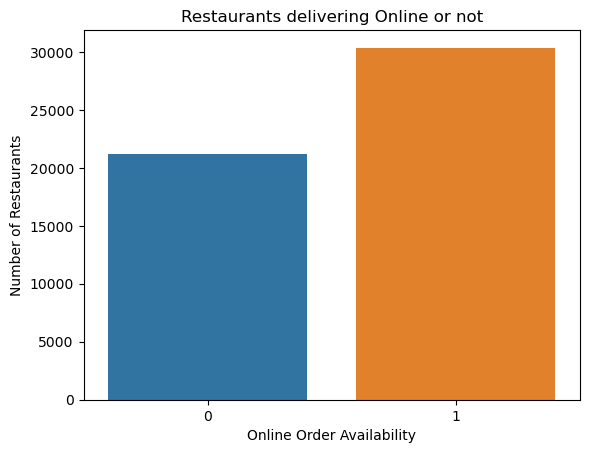

In [42]:
# Create a bar plot
sns.barplot(x=online_order_counts.index, y=online_order_counts.values)

plt.xlabel('Online Order Availability')
plt.ylabel('Number of Restaurants')
plt.title('Restaurants delivering Online or not')

plt.show()


Restaurants allowing table booking or not

In [43]:
# Count the occurrences of each value in the 'book_table' column
book_table_counts = zomato['book_table'].value_counts()
book_table_counts

0    45172
1     6416
Name: book_table, dtype: int64

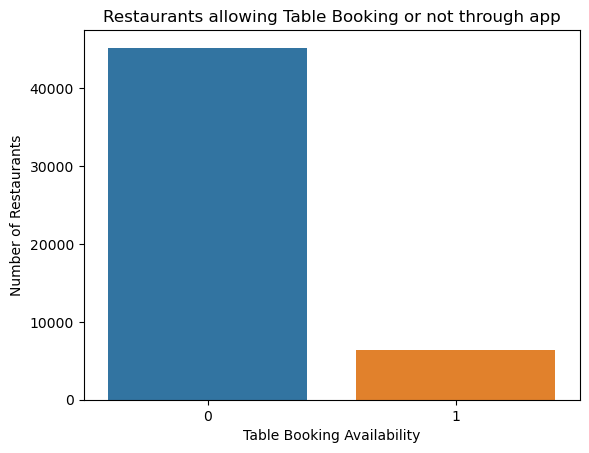

In [44]:
sns.barplot(x=book_table_counts.index, y=book_table_counts.values)


plt.xlabel('Table Booking Availability')
plt.ylabel('Number of Restaurants')
plt.title('Restaurants allowing Table Booking or not through app')

plt.show()

Table booking Rate vs Rate

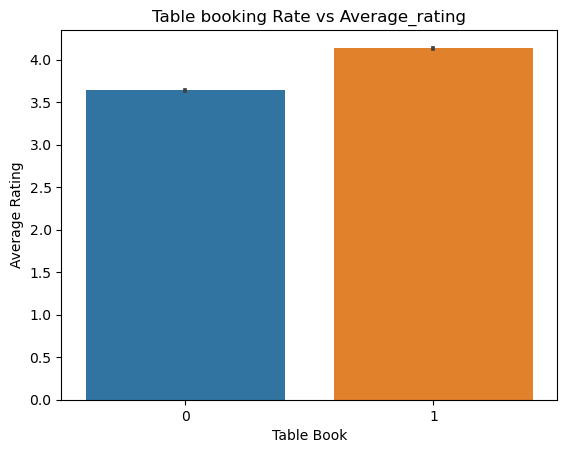

In [45]:
sns.barplot(x=zomato['book_table'], y=zomato['average_rating'])


plt.xlabel('Table Book')
plt.ylabel('Average Rating')
plt.title('Table booking Rate vs Average_rating')

plt.show()

Best Location

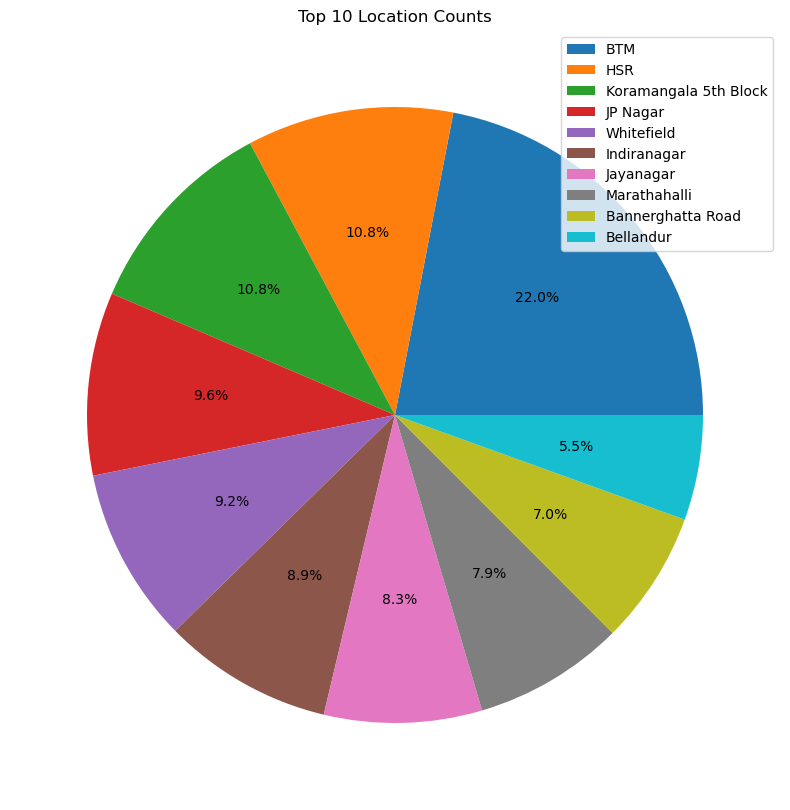

In [46]:
plt.figure(figsize=(10, 10))
# top 10 locations by count
top_locations = zomato['location'].value_counts().head(10)

plt.pie(top_locations, autopct='%1.1f%%')
plt.title('Top 10 Location Counts')
plt.legend(top_locations.index, loc="best")
plt.show()

In [47]:
location_count = zomato['location'].value_counts()
location_counts=location_count.head(10)
location_counts

BTM                      5109
HSR                      2521
Koramangala 5th Block    2502
JP Nagar                 2234
Whitefield               2140
Indiranagar              2075
Jayanagar                1926
Marathahalli             1843
Bannerghatta Road        1628
Bellandur                1283
Name: location, dtype: int64

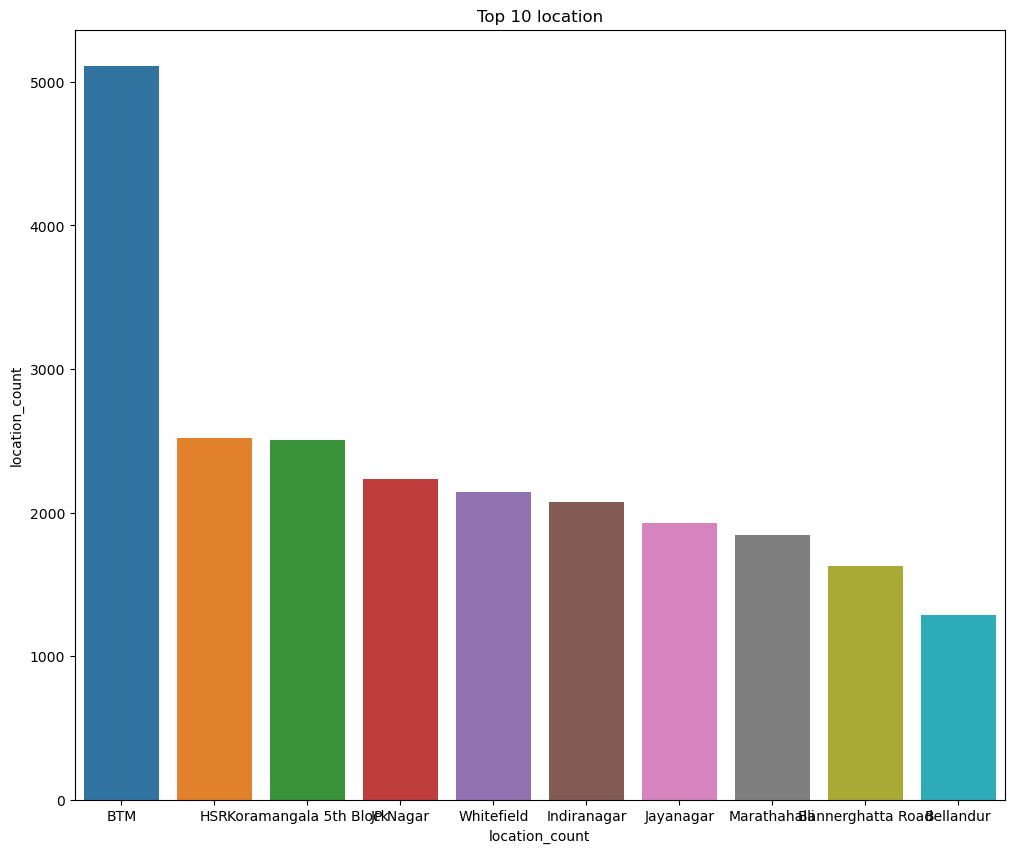

In [48]:
plt.figure(figsize=(12,10))
sns.barplot(x=location_counts.index, y=location_counts.values)


plt.xlabel('location_count')
plt.ylabel('location_count')
plt.title('Top 10 location')

plt.show()

Relation between Location and Rating

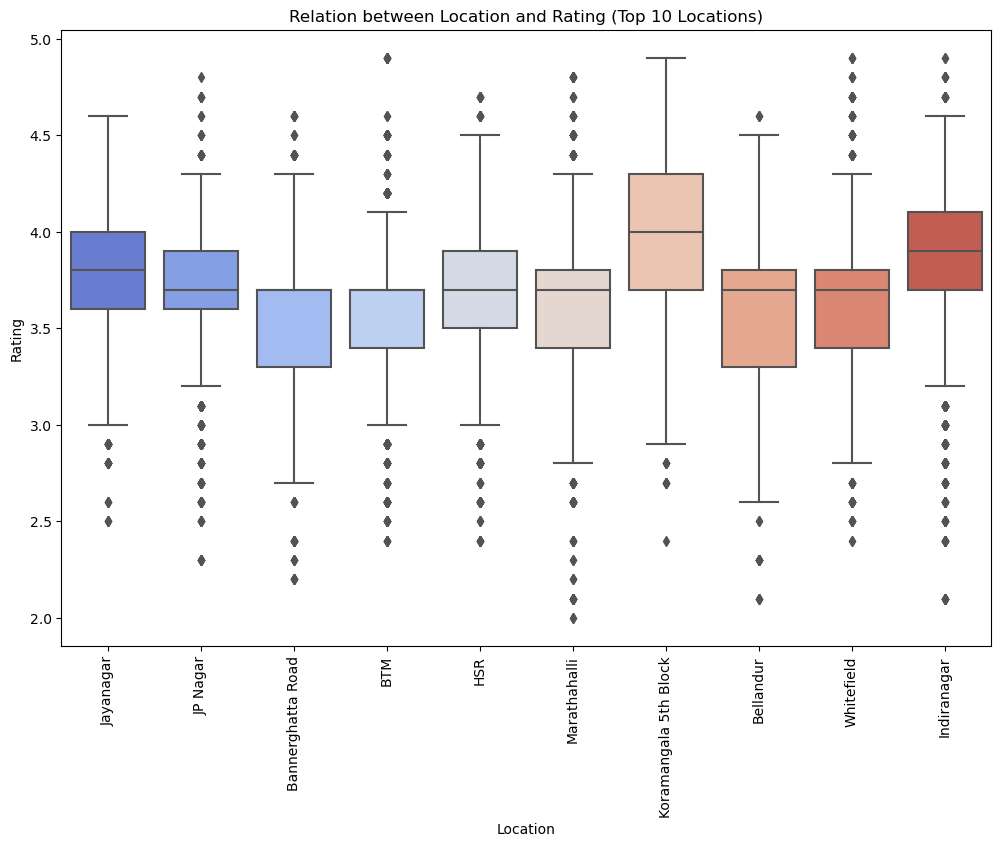

In [49]:
plt.figure(figsize=(12, 8))

# Get the first 10 unique locations
top_locations = zomato['location'].value_counts().head(10).index

# Filter the data to include only the top 10 locations
zomato_top_locations = zomato[zomato['location'].isin(top_locations)]

# Create a box plot
sns.boxplot(data=zomato_top_locations, x='location', y='average_rating', palette='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.title('Relation between Location and Rating (Top 10 Locations)')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.show()

Restaurant Type

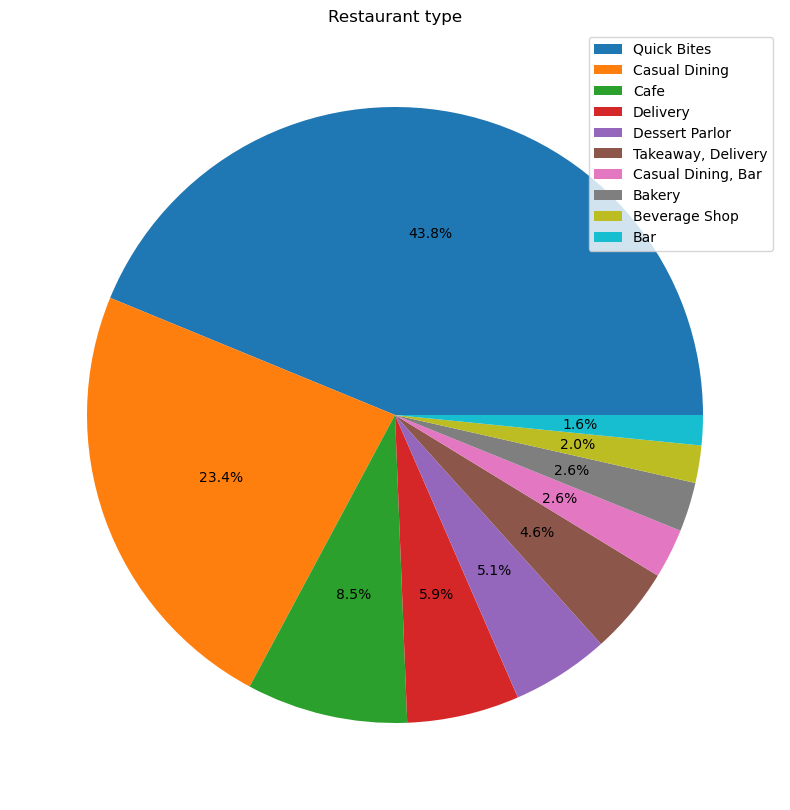

In [50]:
plt.figure(figsize=(10, 10))
# top 10 locations by count
top_rest = zomato['rest_type'].value_counts().head(10)

plt.pie(top_rest, autopct='%1.1f%%')
plt.title('Restaurant type')
plt.legend(top_rest.index, loc="best")
plt.show()

Gaussian Rest type and Rating

Cost of Restaurant

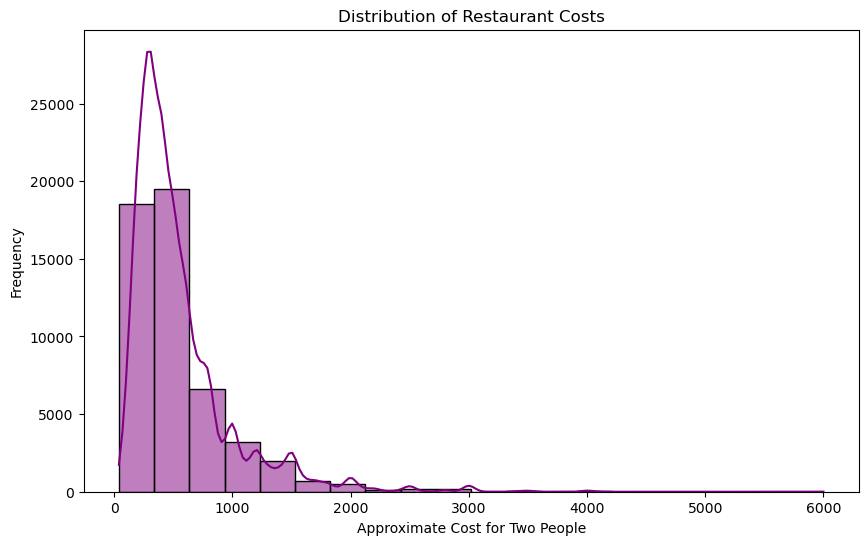

In [51]:
plt.figure(figsize=(10, 6))



# Create a histogram
sns.histplot(data=zomato, x='approx_cost(for two people)', bins=20, kde=True, color='purple')

plt.title('Distribution of Restaurant Costs')
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Frequency')
plt.show()

No. of restaurants in a Location

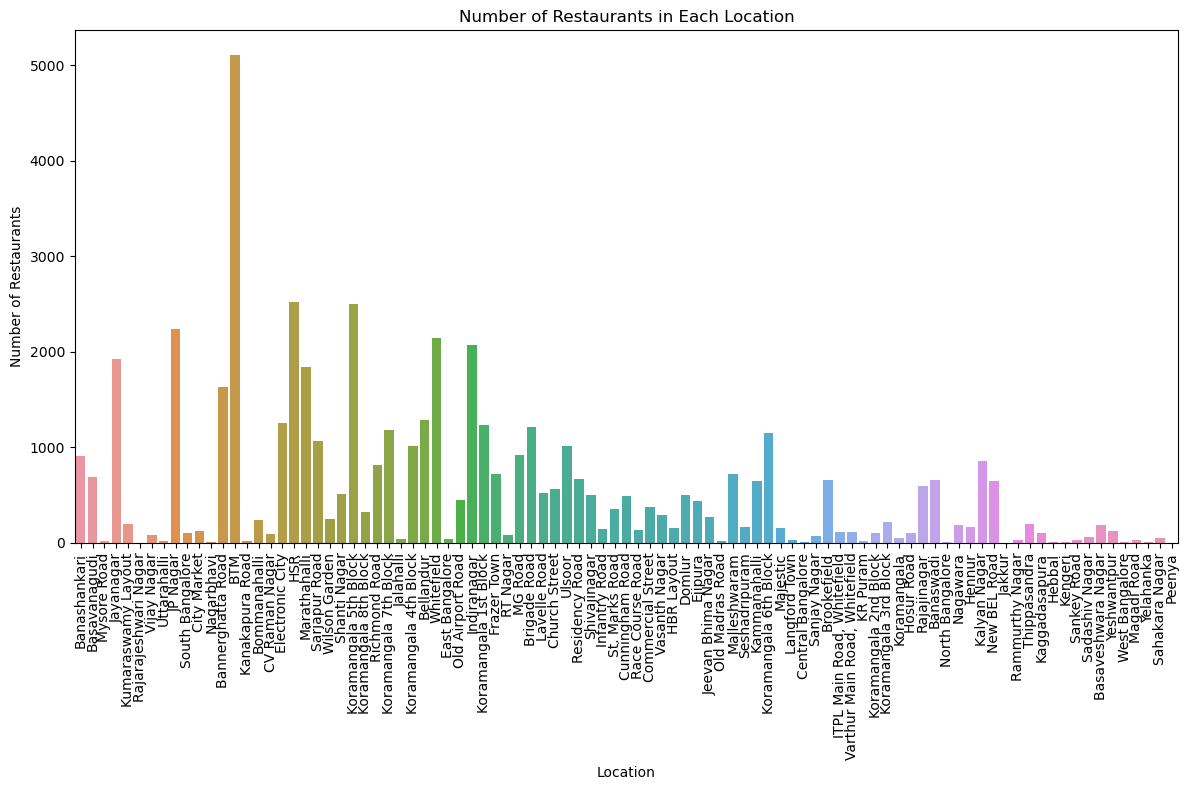

In [52]:
plt.figure(figsize=(12, 8))

# Create a count plot
sns.countplot(data=zomato, x='location')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.title('Number of Restaurants in Each Location')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

Most famous restaurant chains in Bengaluru

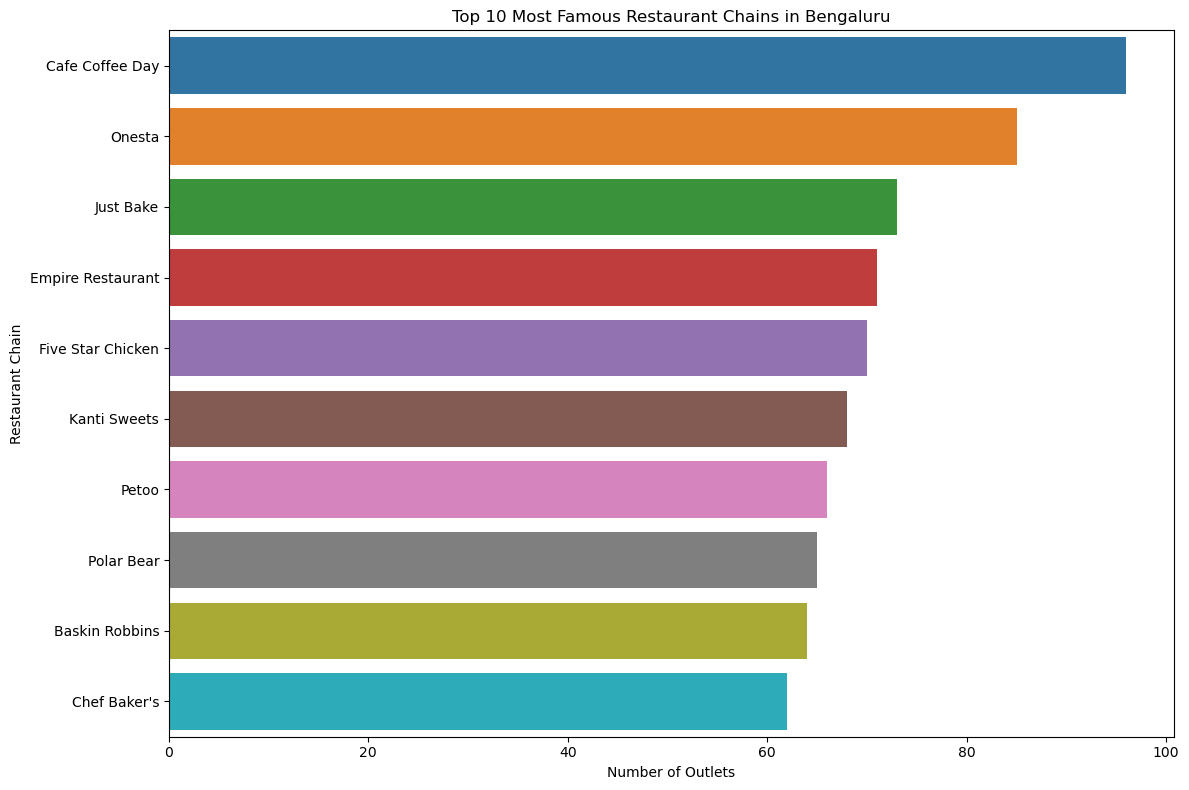

In [53]:
# Group data by restaurant chain and count occurrences
chain_counts = zomato['name'].value_counts()

# Select top N chains (e.g., top 10) for visualization
top_chains = chain_counts.head(10)

plt.figure(figsize=(12, 8))

# Create a bar plot for top chains
sns.barplot(x=top_chains.values, y=top_chains.index)

plt.title('Top 10 Most Famous Restaurant Chains in Bengaluru')
plt.xlabel('Number of Outlets')
plt.ylabel('Restaurant Chain')
plt.tight_layout()
plt.show()